# **Projeto 01** - Exploração e análise de base de dados estruturada
Integrantes: Ankier José, Artur Galvão e Diego Ponte

Base de dados escolhida: [Campanha de marketing de supermercado](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign)




## Importar os pacotes e dados necessários


In [ ]:
!pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0


In [ ]:
# Usaremos os Dataframes da biblitoteca Pandas
import pandas as pd
# Visualizaremos dados com matplotlib e seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# E o gdown para baixarmos nossos dados
import gdown

Executamos as duas células abaixo para baixar o dataframe e armazená-lo como um DataFrame do Pandas:

In [ ]:
url = 'https://drive.google.com/file/d/159eoSdWbU_gGFbygoPD38BfctUzhqZ73/view?usp=sharing'
output = 'marketing_campaign.csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=159eoSdWbU_gGFbygoPD38BfctUzhqZ73
To: /content/marketing_campaign.csv
100%|██████████| 220k/220k [00:00<00:00, 28.4MB/s]


'marketing_campaign.csv'

In [ ]:
df = pd.read_csv('marketing_campaign.csv', sep=';')

## Conhecendo o DataFrame escolhido
Na [página no Kaggle do nosso DataFrame](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign), fomos apresentados superficialmente ao tema, estrutura e possível viés de análise do banco de dados. Aqui, podemos observar informações valiosas como a forma como os dados estão ordenados, quais colunas temos no DataFrame, suas dimensões, tipos de dados...

In [ ]:
# Com o .head(), veremos as primeiras linhas do dataframe
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# .shape nos dá as dimensões do banco de dado, nesse caso, temos 2240 amostras (linhas) e 29 colunas
df.shape

(2240, 29)

In [ ]:
# Aqui, podemos analisar que tipo de dado teremos em cada uma das colunas de análise.
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [ ]:
# Utilizando o .decribe() obtemos informações estatísticas sobre cada uma das colunas
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Aqui, podemos analisar que algumas coisas estão esquisitas, como por exemplo na coluna 'Income', em que temos um valor de máximo (666666) bastante distoante de todo o resto dos dados (a média dos dados é 52247), o que indica que muito provavelmente se trata de um outlier (valor atípico)

In [ ]:
# o .isna().sum() nos dará a quantidade de dados faltantes em cada coluna:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Aqui podemos ver que temos 24 dados faltantes na coluna 'Income', o que também pode prejudicar nossa análise do dataframe.

## Pré-processamento dos dados
Como pudemos ver acima, o banco de dados possui valores atípicos ou faltosos na sua estrutura, o que evidencia que precisamos realizar um estágio de pré-processamento nesse DataFrame. Esse estágio é imprescindível para que tenhamos fundamento nas análises desses dados, melhorando nossa precisão nas tomadas de decisão que faremos a fim de melhorar as campanhas de marketing do supermercado, nosso objetivo final.

In [ ]:
# Criamos a variável mrk para ser nosso dataframe de análise, em que o ID
# do DataFrame original não será útil, então podemos tirá-lo:
mrk = df.iloc[:,1:]
mrk.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Retiramos também outras duas colunas que não serão analisadas aqui:
mrk = mrk.drop('Z_CostContact', axis='columns')
mrk = mrk.drop('Z_Revenue', axis='columns')

In [ ]:
# com isso, ficamos com as seguintes colunas:
mrk.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [ ]:
# Organizamos a ordem em que as colunas 'AcceptedCmp' aparecem:
mrk = mrk[['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Complain', 'Response']]

In [ ]:
mrk.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [ ]:
# Criamos uma nova coluna 'Yr_Customer' que irá armazenar o ano de cadastro do cliente no Supermercado, que será do tipo inteiro (int)
mrk['Yr_Customer'] = mrk['Dt_Customer'].str.slice(start=0, stop=4, step=1)
mrk['Yr_Customer'] = mrk['Yr_Customer'].astype(int)

In [ ]:
mrk.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Yr_Customer
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,0,1,2012
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,2014
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,2013
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,2014
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,2014


In [ ]:
# Com essa nova variável, podemos descobrir a idade do cliente na data de cadastro, o que será objeto de análise no perfil dos clientes.
mrk['Age'] = mrk['Yr_Customer'] - mrk['Year_Birth']

In [ ]:
mrk.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Complain', 'Response', 'Yr_Customer', 'Age'],
      dtype='object')

In [ ]:
# Novamente, organizamos a ordem das colunas. Aqui, tiramos o 'Year_Birth' e 'Dt_Customer', já que, com as variáveis que criamos, passaram a ser redundantes ou desnecessárias.
mrk = mrk[['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Yr_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Complain', 'Response']]

In [ ]:
mrk.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Yr_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,55,Graduation,Single,58138.0,0,0,2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,60,Graduation,Single,46344.0,1,1,2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,48,Graduation,Together,71613.0,0,0,2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,30,Graduation,Together,26646.0,1,0,2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,33,PhD,Married,58293.0,1,0,2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [ ]:
# Podemos ver que temos dados faltosos na coluna 'Income'
mrk.isna().sum()

,0
Age,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Yr_Customer,0
Recency,0
MntWines,0
MntFruits,0


In [ ]:
mrk.shape

(2240, 26)

In [ ]:
# Usaremos .dropna() para retirar as amostras que tenham dados faltosos. Essa retirada não afetará as análises futuras de forma considerável.
mrk = mrk.dropna(axis=0, how='any')

In [ ]:
# com o .shape de antes e depois, verificamos que acabamos de retirar 24 linhas.
mrk.shape

(2216, 26)

In [ ]:
# Agora, vamos retirar as amostras duplicadas, já que podem impactar as conclusões que teremos.
mrk = mrk.drop_duplicates()

In [ ]:
# Com o .shape, verificamos que tinhamos 182 (2216-2034) dados repetidos, um valor expressivo.
mrk.shape

(2034, 26)

Agora, vamos verificar se as colunas têm valores atípicos ou que podem de alguma forma impactar negativamente nossas análises:

In [ ]:
# Checaremos as maiores idades do nosso banco de dados.
mrk.sort_values(by=['Age'], ascending=False).head(10)

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Yr_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
239,121,2n Cycle,Single,60182.0,0,1,2014,23,8,0,...,0,2,4,0,0,0,0,0,0,0
339,114,PhD,Together,83532.0,0,0,2013,36,755,144,...,6,4,1,0,0,0,0,1,0,0
192,113,2n Cycle,Divorced,36640.0,1,0,2013,99,15,6,...,1,2,5,0,0,0,0,0,1,0
1950,73,PhD,Single,51141.0,0,0,2013,96,144,0,...,1,4,5,0,0,0,0,0,0,0
424,72,PhD,Married,93027.0,0,0,2013,77,1285,42,...,10,5,2,0,0,0,0,1,0,0
415,71,PhD,Married,75865.0,0,0,2014,73,483,0,...,5,10,1,0,0,0,0,0,0,0
519,70,Master,Married,80184.0,0,0,2014,19,1035,134,...,3,10,3,1,0,0,0,1,0,0
1923,70,Master,Single,77598.0,0,0,2013,53,1193,33,...,5,13,3,0,0,0,0,1,0,0
1150,70,PhD,Widow,57513.0,0,0,2013,59,735,40,...,3,13,6,0,0,0,0,0,0,0
39,70,PhD,Divorced,48948.0,0,0,2013,53,437,8,...,10,5,6,0,0,1,0,0,0,1


In [ ]:
# Checamos também as menores idades do nosso banco de dados.
mrk.sort_values(by=['Age'], ascending=True).head(10)

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Yr_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
46,16,2n Cycle,Married,7500.0,0,0,2012,24,3,18,...,1,3,9,0,0,0,0,0,0,1
2213,17,2n Cycle,Single,80617.0,0,0,2012,42,594,51,...,6,8,2,0,0,0,0,0,0,0
1850,17,2n Cycle,Single,83257.0,0,0,2012,56,536,27,...,10,12,6,0,0,1,0,1,1,1
1163,18,Graduation,Together,80685.0,0,0,2012,55,241,45,...,4,10,2,0,0,0,0,0,0,0
1170,18,Basic,Married,14421.0,0,0,2014,81,0,0,...,0,2,5,0,0,1,0,0,0,0
914,18,Graduation,Single,95529.0,0,0,2012,29,770,29,...,3,7,3,0,0,0,0,1,0,1
2093,19,Graduation,Absurd,79244.0,0,0,2012,58,471,102,...,10,7,1,1,0,0,0,1,0,1
696,19,Graduation,Single,34824.0,0,0,2014,65,4,2,...,0,2,6,0,0,0,0,0,0,0
747,19,Graduation,Single,71163.0,0,0,2014,30,283,17,...,8,12,1,0,0,0,0,0,0,0
921,20,Graduation,Single,72354.0,0,0,2013,67,315,26,...,10,6,1,0,0,0,0,0,0,0


Segundo nossas pesquisas, o homem mais velho dos Estados Unidos no período da obtenção desses dados, tinha 112 anos, o que torna as 3 primeiras amostras impossíveis.

In [ ]:
mrk = mrk[mrk['Age'] <= 112]

In [ ]:
mrk.sort_values(by=['Age'], ascending=False).head(10)

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Yr_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
1950,73,PhD,Single,51141.0,0,0,2013,96,144,0,...,1,4,5,0,0,0,0,0,0,0
424,72,PhD,Married,93027.0,0,0,2013,77,1285,42,...,10,5,2,0,0,0,0,1,0,0
415,71,PhD,Married,75865.0,0,0,2014,73,483,0,...,5,10,1,0,0,0,0,0,0,0
1270,70,Graduation,Married,55956.0,0,0,2014,22,760,38,...,3,4,4,0,0,0,1,0,0,0
358,70,Master,Married,65073.0,0,0,2013,65,629,17,...,3,5,2,0,0,0,0,0,1,0
1923,70,Master,Single,77598.0,0,0,2013,53,1193,33,...,5,13,3,0,0,0,0,1,0,0
1413,70,Graduation,Married,80589.0,0,0,2014,25,507,93,...,10,5,1,1,0,0,0,0,0,1
39,70,PhD,Divorced,48948.0,0,0,2013,53,437,8,...,10,5,6,0,0,1,0,0,0,1
1150,70,PhD,Widow,57513.0,0,0,2013,59,735,40,...,3,13,6,0,0,0,0,0,0,0
519,70,Master,Married,80184.0,0,0,2014,19,1035,134,...,3,10,3,1,0,0,0,1,0,0


In [ ]:
# Agora, vamos chegar quais dados únicos temos na variável categórica 'Marital_Status' (Estado civil)
mrk['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
mrk[mrk['Marital_Status'] == 'YOLO'].count()

,0
Age,2
Education,2
Marital_Status,2
Income,2
Kidhome,2
Teenhome,2
Yr_Customer,2
Recency,2
MntWines,2
MntFruits,2


In [ ]:
mrk[mrk['Marital_Status'] == 'Absurd'].count()

,0
Age,2
Education,2
Marital_Status,2
Income,2
Kidhome,2
Teenhome,2
Yr_Customer,2
Recency,2
MntWines,2
MntFruits,2


Aqui, podemos ver que temos os valores 'YOLO' e 'Absurd' sendo amostrados 2 vezes cada. Como se tratam de um dados pouco recorrentes e sem sentido atribuído, podemos retirá-los. Além disso, podemos considerar o dado 'Alone' como 'Single' sem perda de significado.

In [ ]:
mrk = mrk[mrk['Marital_Status'] != 'YOLO']
mrk = mrk[mrk['Marital_Status'] != 'Absurd']
mrk['Marital_Status'] = mrk['Marital_Status'].replace('Alone', 'Single')

In [ ]:
# Vamos checar os maiores e menores valores de 'Income'
mrk.sort_values(by=['Income'], ascending=False).head(10)

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Yr_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
2233,36,Graduation,Together,666666.0,1,0,2013,23,9,14,...,1,3,6,0,0,0,0,0,0,0
617,37,PhD,Together,162397.0,1,1,2013,31,85,1,...,0,1,1,0,0,0,0,0,0,0
687,30,PhD,Married,160803.0,0,0,2012,21,55,16,...,28,1,0,0,0,0,0,0,0,0
1300,42,Master,Together,157733.0,1,0,2013,37,39,1,...,0,1,1,0,0,0,0,0,0,0
164,41,PhD,Married,157243.0,0,1,2014,98,20,2,...,22,0,0,0,0,0,0,0,0,0
1653,36,Graduation,Together,157146.0,0,0,2013,13,1,0,...,28,0,1,0,0,0,0,0,0,0
2132,64,PhD,Married,156924.0,0,0,2013,85,2,1,...,0,0,0,0,0,0,0,0,0,0
655,39,Graduation,Divorced,153924.0,0,0,2014,81,1,1,...,0,0,0,0,0,0,0,0,0,0
1898,69,PhD,Single,113734.0,0,0,2014,9,6,2,...,0,0,1,0,0,0,0,0,0,0
646,43,Graduation,Together,105471.0,0,0,2013,36,1009,181,...,8,13,3,1,0,0,0,1,0,1


In [ ]:
mrk.sort_values(by=['Income'], ascending=True).head(10)

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Yr_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
1245,43,Graduation,Divorced,1730.0,0,0,2014,65,1,1,...,0,0,20,0,0,0,0,0,0,0
21,34,Graduation,Married,2447.0,1,0,2013,42,1,1,...,28,0,1,0,0,0,0,0,0,0
1524,40,Graduation,Single,3502.0,1,0,2013,56,2,1,...,0,0,14,0,0,0,0,0,0,0
1846,51,PhD,Married,4023.0,1,1,2014,29,5,0,...,0,0,19,0,0,0,0,0,0,0
1975,44,Graduation,Married,4428.0,0,1,2013,0,16,4,...,0,0,1,0,0,0,0,0,0,0
981,49,Graduation,Divorced,4861.0,0,0,2014,20,2,1,...,0,0,14,0,0,0,0,0,0,0
2214,37,Graduation,Married,5305.0,0,1,2013,12,12,4,...,0,0,13,0,0,0,0,0,0,0
9,64,PhD,Together,5648.0,1,1,2014,68,28,0,...,0,0,20,0,0,1,0,0,0,0
1328,31,Master,Single,6560.0,0,0,2013,2,67,11,...,0,1,17,0,0,0,0,0,0,0
774,55,PhD,Together,6835.0,0,1,2012,76,107,2,...,0,1,20,0,0,0,0,0,0,0


In [ ]:
# Como já havíamos percebido, temos um outlier de valor 666666. Vamos retirá-lo.
mrk = mrk[mrk['Income'] != 666666.0]

In [ ]:
mrk.sort_values(by=['Income'], ascending=False).head(10)

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Yr_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
617,37,PhD,Together,162397.0,1,1,2013,31,85,1,...,0,1,1,0,0,0,0,0,0,0
687,30,PhD,Married,160803.0,0,0,2012,21,55,16,...,28,1,0,0,0,0,0,0,0,0
1300,42,Master,Together,157733.0,1,0,2013,37,39,1,...,0,1,1,0,0,0,0,0,0,0
164,41,PhD,Married,157243.0,0,1,2014,98,20,2,...,22,0,0,0,0,0,0,0,0,0
1653,36,Graduation,Together,157146.0,0,0,2013,13,1,0,...,28,0,1,0,0,0,0,0,0,0
2132,64,PhD,Married,156924.0,0,0,2013,85,2,1,...,0,0,0,0,0,0,0,0,0,0
655,39,Graduation,Divorced,153924.0,0,0,2014,81,1,1,...,0,0,0,0,0,0,0,0,0,0
1898,69,PhD,Single,113734.0,0,0,2014,9,6,2,...,0,0,1,0,0,0,0,0,0,0
646,43,Graduation,Together,105471.0,0,0,2013,36,1009,181,...,8,13,3,1,0,0,0,1,0,1
252,39,Graduation,Divorced,102692.0,0,0,2013,5,168,148,...,9,13,2,1,1,0,1,1,0,1


Agora, vamos criar duas novas variáveis que serão de grande importância para nossa pesquisa.
Foi dado na página do Kaggle e no DataFrame original essas duas informações:
> Z_CostContact:
Custo para contatar um consumidor = 3

> Z_Revenue:
Receita após o cliente aceitar a campanha = 11

Então, criaremos uma variável para medir o lucro dependendo de quantas campanhas foram aceitas.

Como serão feitas 6 campanhas ao cliente, o objetivo seria que o cliente aceitasse, no mínimo, 2 campanhas

In [ ]:
# Variável que irá armazenar a quantidade total de campanhas aceitas
mrk['TotalAccepted'] = mrk['AcceptedCmp1'] + mrk['AcceptedCmp2'] + mrk['AcceptedCmp3'] + mrk['AcceptedCmp4'] + mrk['AcceptedCmp5'] + mrk['Response']

In [ ]:
mrk.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Yr_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,TotalAccepted
0,55,Graduation,Single,58138.0,0,0,2012,58,635,88,...,4,7,0,0,0,0,0,0,1,1
1,60,Graduation,Single,46344.0,1,1,2014,38,11,1,...,2,5,0,0,0,0,0,0,0,0
2,48,Graduation,Together,71613.0,0,0,2013,26,426,49,...,10,4,0,0,0,0,0,0,0,0
3,30,Graduation,Together,26646.0,1,0,2014,26,11,4,...,4,6,0,0,0,0,0,0,0,0
4,33,PhD,Married,58293.0,1,0,2014,94,173,43,...,6,5,0,0,0,0,0,0,0,0


In [ ]:
# Variável que irá armazenar o lucro (ou prejuízo) com as campanhas feitas ao cliente
mrk['Profit'] = (mrk['TotalAccepted'] * 11) - 18

In [ ]:
mrk.head(10)

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Yr_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,TotalAccepted,Profit
0,55,Graduation,Single,58138.0,0,0,2012,58,635,88,...,7,0,0,0,0,0,0,1,1,-7
1,60,Graduation,Single,46344.0,1,1,2014,38,11,1,...,5,0,0,0,0,0,0,0,0,-18
2,48,Graduation,Together,71613.0,0,0,2013,26,426,49,...,4,0,0,0,0,0,0,0,0,-18
3,30,Graduation,Together,26646.0,1,0,2014,26,11,4,...,6,0,0,0,0,0,0,0,0,-18
4,33,PhD,Married,58293.0,1,0,2014,94,173,43,...,5,0,0,0,0,0,0,0,0,-18
5,46,Master,Together,62513.0,0,1,2013,16,520,42,...,6,0,0,0,0,0,0,0,0,-18
6,41,Graduation,Divorced,55635.0,0,1,2012,34,235,65,...,6,0,0,0,0,0,0,0,0,-18
7,28,PhD,Married,33454.0,1,0,2013,32,76,10,...,8,0,0,0,0,0,0,0,0,-18
8,39,PhD,Together,30351.0,1,0,2013,19,14,0,...,9,0,0,0,0,0,0,1,1,-7
9,64,PhD,Together,5648.0,1,1,2014,68,28,0,...,20,0,0,1,0,0,0,0,1,-7


In [ ]:
# Vamos ver se o Supermercado está lucrando ou não com essas campanhas:
mrk['Profit'].sum()

-26359

In [ ]:
# Em média, ao fazerem 6 campanhas a um cliente, quantas ele aceita?
mrk['TotalAccepted'].mean()

0.45360315893385983

Realmente, é clara a necessidade de repensar essas campanhas. Precisamos fazer uma Análise Exploratória dos Dados para direcionar melhor as decisões do Supermercado de forma a gerar mais vendas, e consequentemente mais lucro.

## Análise Exploratória dos Dados
Finalmente, podemos utilizar recursos estatísticos e de visualização de dados para tirar conclusões valiosas do nosso conjunto de dados

Inicialmente, vamos utilizar a biblioteca matplotlib.pyplot para visualizarmos, em gráficos de colunas, as distribuições de renda e idade da população, traçando o perfil dos clientes.

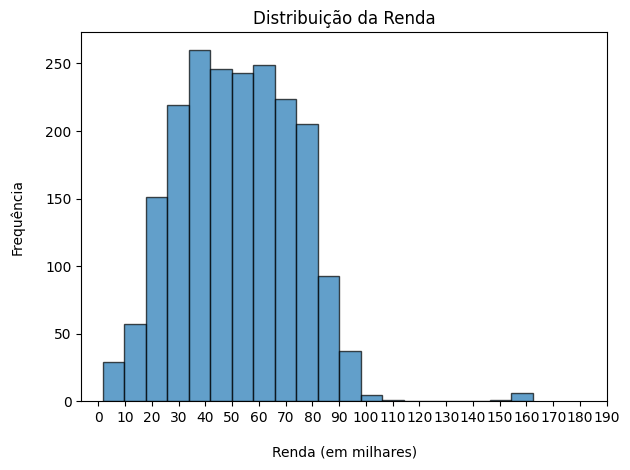

In [ ]:
incomeScaled = mrk['Income'] / 1000
plt.hist(incomeScaled, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribuição da Renda')
plt.xlabel('Renda (em milhares)', labelpad=15)
plt.ylabel('Frequência', labelpad=15)
plt.xticks(range(0, 200, 10))

plt.tight_layout()
plt.show()

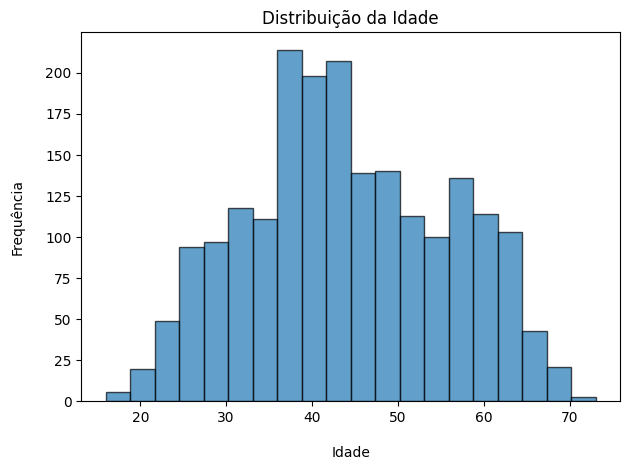

In [ ]:
plt.hist(mrk['Age'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribuição da Idade')
plt.xlabel('Idade', labelpad=15)
plt.ylabel('Frequência', labelpad=15)

plt.tight_layout()
plt.show()

Podemos concluir que a maioria dos clientes desse Supermercado têm entre 35 e 50 anos, com renda anual em torno de $50.000,00.

Também utilizando matplotlib.pyplot, vamos analisar a média gasta pelos clientes por categorias de produto e a média de compras por canal de venda.

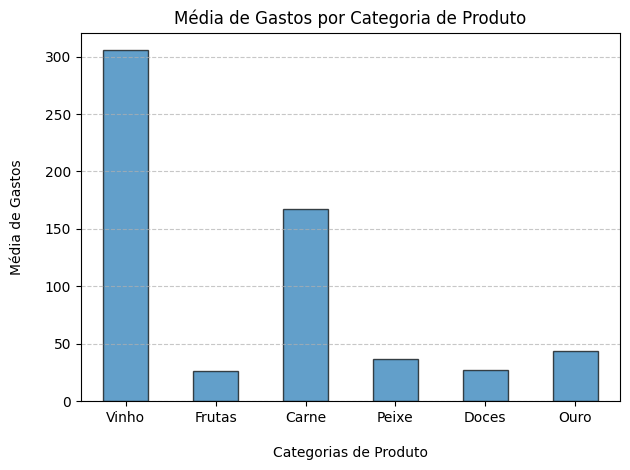

In [ ]:
meanSpending = mrk[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

meanSpending.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Média de Gastos por Categoria de Produto')
plt.xlabel('Categorias de Produto', labelpad=15)
plt.ylabel('Média de Gastos', labelpad=15)
plt.xticks(ticks=range(len(meanSpending)), labels=['Vinho', 'Frutas', 'Carne', 'Peixe', 'Doces', 'Ouro'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

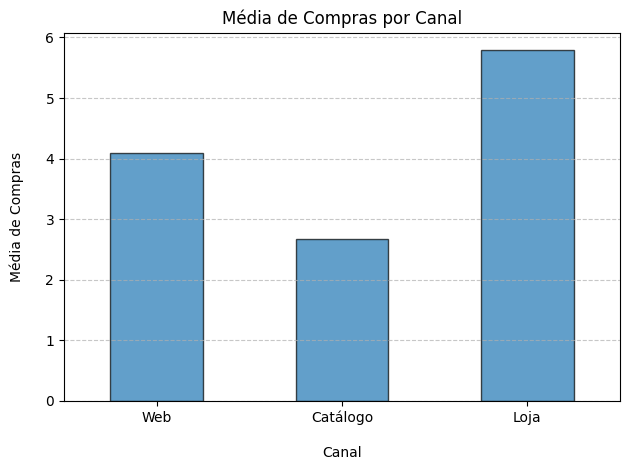

In [ ]:
meanChannels = mrk[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

meanChannels.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Média de Compras por Canal')
plt.xlabel('Canal', labelpad=15)
plt.ylabel('Média de Compras', labelpad=15)
plt.xticks(ticks=range(len(meanChannels)), labels=['Web', 'Catálogo', 'Loja'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Concluímos que grande parte dos lucros do Supermercado vêm da venda de vinhos e carnes, e que o canal mais utilizado pelos clientes é a loja física, seguida pela virtual e pelo catálogo.

Agora, vamos verificar se a média de aceitação das campanhas entre as 500 maiores rendas é maior do que a média geral da população, que como vimos acima, é de 0,446.

In [ ]:
mrkProfit1 = mrk.sort_values(by=['Income'], ascending=False).head(500)
mrkProfit1.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Yr_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,TotalAccepted,Profit
617,37,PhD,Together,162397.0,1,1,2013,31,85,1,...,1,0,0,0,0,0,0,0,0,-18
687,30,PhD,Married,160803.0,0,0,2012,21,55,16,...,0,0,0,0,0,0,0,0,0,-18
1300,42,Master,Together,157733.0,1,0,2013,37,39,1,...,1,0,0,0,0,0,0,0,0,-18
164,41,PhD,Married,157243.0,0,1,2014,98,20,2,...,0,0,0,0,0,0,0,0,0,-18
1653,36,Graduation,Together,157146.0,0,0,2013,13,1,0,...,1,0,0,0,0,0,0,0,0,-18


In [ ]:
mrkProfit1['TotalAccepted'].mean()

1.016

Como podemos ver, a média de aceitação dessa amostra de clientes é 2,4 vezes maior que média de aceitação da população, o que indica que focar as campanhas nesse público pode ser aumentar o sucesso das campanhas; outra alternativa seria adaptar as campanhas para que tenham maior sucesso entre os clientes com menor renda.

Como é de se esperar, a média entre os 500 cliente com menor renda será bem abaixo da média populacional:

In [ ]:
mrkProfit2 = mrk.sort_values(by=['Income'], ascending=True).head(500)
mrkProfit2.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Yr_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,TotalAccepted,Profit
1245,43,Graduation,Divorced,1730.0,0,0,2014,65,1,1,...,20,0,0,0,0,0,0,0,0,-18
21,34,Graduation,Married,2447.0,1,0,2013,42,1,1,...,1,0,0,0,0,0,0,0,0,-18
1524,40,Graduation,Single,3502.0,1,0,2013,56,2,1,...,14,0,0,0,0,0,0,0,0,-18
1846,51,PhD,Married,4023.0,1,1,2014,29,5,0,...,19,0,0,0,0,0,0,0,0,-18
1975,44,Graduation,Married,4428.0,0,1,2013,0,16,4,...,1,0,0,0,0,0,0,0,0,-18


In [ ]:
mrkProfit2['TotalAccepted'].mean()

0.188

Vamos checar se o estado civil (Marital_Status) dos clientes influenciam de alguma forma seu grau de aceitação para as campanhas do Supermercado, separando dataframe para cada estado civil e calculando a média da variável TotalAccepted.

In [ ]:
mrk['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [ ]:
mrk[mrk['Marital_Status'] == 'Single']['TotalAccepted'].mean()

0.528344671201814

In [ ]:
mrk[mrk['Marital_Status'] == 'Together']['TotalAccepted'].mean()

0.396484375

In [ ]:
mrk[mrk['Marital_Status'] == 'Married']['TotalAccepted'].mean()

0.42385786802030456

In [ ]:
mrk[mrk['Marital_Status'] == 'Divorced']['TotalAccepted'].mean()

0.4883720930232558

In [ ]:
mrk[mrk['Marital_Status'] == 'Widow']['TotalAccepted'].mean()

0.6285714285714286

Apesar de visualizarmos que esses diferentes grupos apresentam algumas diferenças na sua média de aceitação, essa análise torna-se pouco significante haja vista que todos estão bastante abaixo da taxa de aceitação que geraria lucro para o mercado (2.0), e então devemos analisar melhor o dataframe para propor soluções que possam de fato nos aproximar dessa taxa.

Agora, vamos criar um dataframe reduzido, que chamaremos de mrk2, para visualizar um gráfico de correlação da biblioteca seaborn

In [ ]:
mrk.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Yr_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'Complain', 'Response', 'TotalAccepted', 'Profit'],
      dtype='object')

In [ ]:
mrk2 = mrk.loc[:, ['Age', 'Income', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'TotalAccepted', 'Profit']]

Precisamos realizar um mapping das variáveis categóricas, já que para analisar as correlações precisamos de dados numéricos.

In [ ]:
education_mapping = {
    'Graduation': 1,
    'PhD': 4,
    'Master': 3,
    'Basic': 0,
    '2n Cycle': 2
}

mrk2['Education'] = mrk2['Education'].map(education_mapping)


In [ ]:
mrk2.head()

,Age,Income,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAccepted,Profit
0,55,58138.0,1,635,88,546,172,88,88,1,-7
1,60,46344.0,1,11,1,6,2,1,6,0,-18
2,48,71613.0,1,426,49,127,111,21,42,0,-18
3,30,26646.0,1,11,4,20,10,3,5,0,-18
4,33,58293.0,4,173,43,118,46,27,15,0,-18


<Axes: >

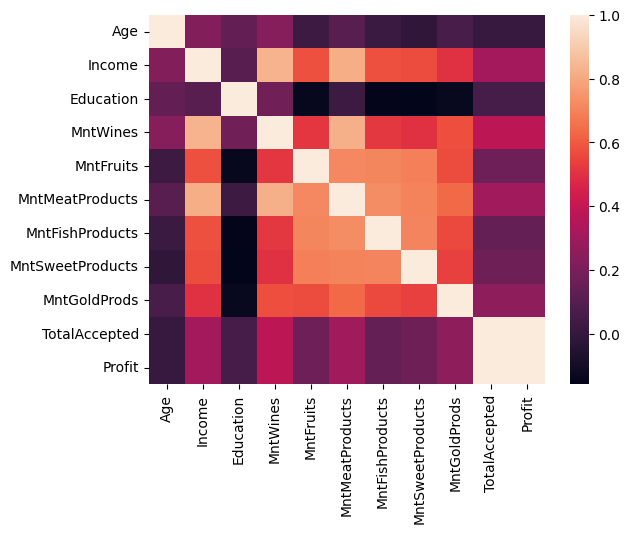

In [ ]:
corr = mrk2.corr(method="spearman")
sns.heatmap(corr)

Com o gráfico de correlação acima, podemos prever quais variáveis mais influenciam o índice de sucesso das campanhas: quanto mais claro for o ponto em que duas variáveis se encontram, mais correlacionadas são elas.
Assim, olhando especificamente para a linha 'Profit', podemos inferir que as variáveis 'Income', 'MntWines' e 'MntMeatProducts' são as que mais influenciam positivamente o lucro do Supermercado.

Podemos, inclusive, fazermos análises de perfil dos clientes: por exemplo, podemos ver que o 'MntWines' tem grande relação com 'MntMeatProducts', e por isso seria interessante fazer ofertas de vinhos para clientes que consomem bastante carne e vice-versa.

Agora, criaremos um mrk3 apenas com informações sociais dos clientes, para visualizarmos melhor a correlação desses dados com o lucro do Supermercado

In [ ]:
mrk3 = mrk2.loc[:, ['Age', 'Income', 'Education', 'TotalAccepted']]

<Axes: >

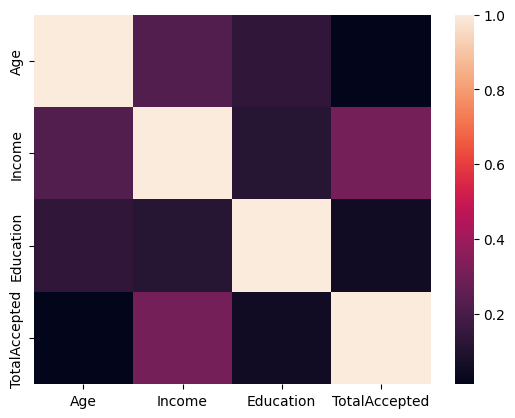

In [ ]:
corr = mrk3.corr(method="spearman")
sns.heatmap(corr)

Aqui, podemos ver que as a taxa de sucesso das campanhas tem alta relação com a renda do cliente, baixa com seu nível de educação e praticamente nula com sua idade e seu estado civil.

Vamos criar um dataframe que relaciona o perfil do comprador com a taxa de sucesso das campanhas. As variáveis agora serão de total gasto em diversos tipos de produtos (carne, peixe, doces, frutas...), a quantidade de compras feitas com desconto, a quantidade de compras através da internet, do católogo e da loja física, além do número de visitas ao site do Supermercado.

In [ ]:
mrk4 = mrk.loc[:, ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Profit']]

<Axes: >

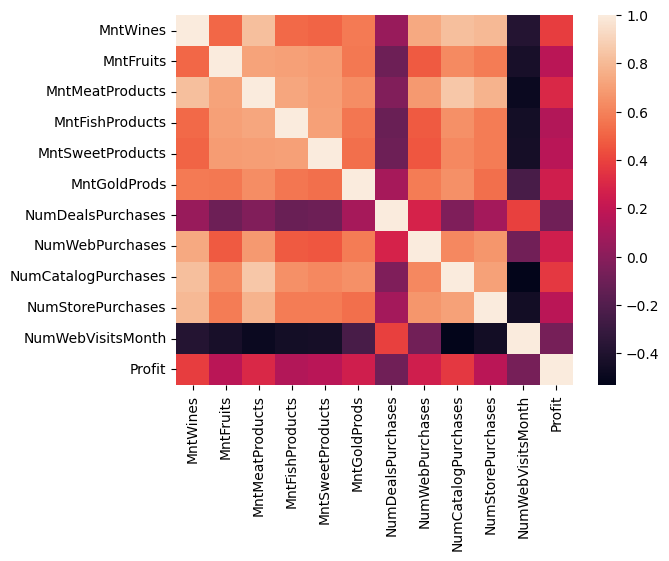

In [ ]:
corr = mrk4.corr(method="spearman")
sns.heatmap(corr)

Aqui, podemos ver que o lucro do Supermercado tem relação com 'NumCatalogPurchases' e 'NumWebPurchases', além de 'Income', 'MntWines' e 'MntMeatProducts', como já tínhamos visto.

##Conclusões e Insights da AED
Com a análise exploratória de dados que fizemos, podemos ter sugestões valiosas para reverter a situação das campanhas de marketing desse Supermercado, diminuindo o prejuízo que estão tendo e possivelmente gerando lucro.

Pudemos ver que a taxa de aceitação das campanhas pelos clientes está bastante relacionada com sua renda, não tendo muita relação com sua idade ou estado civil. Assim sendo, tendo em vista o aumento da taxa de aceitação, seria interessante focar essas campanhas no público de maior renda, ao passo que campanhas adaptadas e direcionadas ao público de menor renda também sejam veiculadas.

Além disso, vimos que, apesar da maioria das vendas serem realizadas através da loja física, os clientes que compram pelo catálogo ou site são mais propensos a aceitarem as campanhas feitas pelo Supermercado. Dessa forma, investir na usabilidade e marketing através do site seria uma boa pedida.

Por fim, visualizando o gráfico de correlação, podemos tirar ideias interessantes ao analisar o perfil de cliente que gasta mais com vinhos, carnes, frutas, etc.; direcionando campanhas específicas desses produtos para os clientes que se enquadram no perfil, aumentaríamos o grau de aceitação por serem ofertas que aqueles clientes naturalmente estariam interessados.

--------------------------

# **Projeto 2** - Modelo de Aprendizado de Máquina



## Importar os pacotes e dados necessários

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

## Normalização dos grupos de clientes

In [ ]:
# Vamos checar a quantidade de clientes por número de campanhas aceitas
mrk['TotalAccepted'].value_counts()

,count
TotalAccepted,
0,1464
1,344
2,130
3,46
4,33
5,9


In [ ]:
#Criamos o dataframe que vamos usar para testes e predições
mrkd = mrk

In [ ]:
# Como o número de pessoas que aceitam 2 campanhas ou mais é bem pequeno em relação aos demais grupos, podemos unir os clientes que aceitaram 2, 3, 4 e 5 campanhas em um grupo só
mrkd.loc[mrkd['TotalAccepted'] >= 2, 'TotalAccepted'] = 2

In [ ]:
mrkd['TotalAccepted'].value_counts()

,count
TotalAccepted,
0,1464
1,344
2,218


In [ ]:
# Criamos as classes de clientes: os que não aceitam campanhas, os que aceitam apenas uma e os que aceitam mais de uma.
class_0 = mrkd[mrkd['TotalAccepted'] == 0]
class_1 = mrkd[mrkd['TotalAccepted'] == 1]
class_2 = mrkd[mrkd['TotalAccepted'] == 2]

In [ ]:
# Para garantir que os grupos tenham dimensões de mesma escala, vamos criar amostras de mesmo tamanho de todos os grupos; para isso, descobrimos o tamanho do menor grupo:
min_class_size = min(len(class_0), len(class_1), len(class_2))

In [ ]:
# e fazemos com que os demais tenham esse tamanho, composto por clientes aleátorios de cada grupo
class_0_balanced = class_0.sample(n=min_class_size, random_state=42)
class_1_balanced = class_1.sample(n=min_class_size, random_state=42)
class_2_balanced = class_2

In [ ]:
# Fazemos do nosso dataframe a junção dos três grupos de clientes que temos
mrkd = pd.concat([class_0_balanced, class_1_balanced, class_2_balanced])

In [ ]:
mrkd['TotalAccepted'].value_counts()

,count
TotalAccepted,
0,218
1,218
2,218


In [ ]:
mrkd.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Yr_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'Complain', 'Response', 'TotalAccepted', 'Profit'],
      dtype='object')

In [ ]:
# Criamos o dataframe de informações de cada cliente para que seja traçado seu perfil:
X = mrkd.iloc[:, 0:19]

In [ ]:
X.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Yr_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
1950,73,PhD,Single,51141.0,0,0,2013,96,144,0,7,0,0,6,1,3,1,4,5
248,24,PhD,Married,67546.0,0,0,2012,90,864,134,768,150,38,172,1,4,10,5,3
389,45,PhD,Divorced,83664.0,1,1,2013,57,866,21,151,28,21,86,3,2,2,12,5
767,25,Graduation,Together,67430.0,0,0,2012,6,595,97,291,127,133,121,1,11,5,12,6
1454,47,PhD,Together,32727.0,0,0,2012,38,167,13,180,86,13,70,2,7,3,5,8


In [ ]:
# Tiramos os dados categóricos, preparando o dataframe para treino de predição:
X = X.drop('Education', axis=1)
X = X.drop('Marital_Status', axis=1)
X.head()

,Age,Income,Kidhome,Teenhome,Yr_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
1950,73,51141.0,0,0,2013,96,144,0,7,0,0,6,1,3,1,4,5
248,24,67546.0,0,0,2012,90,864,134,768,150,38,172,1,4,10,5,3
389,45,83664.0,1,1,2013,57,866,21,151,28,21,86,3,2,2,12,5
767,25,67430.0,0,0,2012,6,595,97,291,127,133,121,1,11,5,12,6
1454,47,32727.0,0,0,2012,38,167,13,180,86,13,70,2,7,3,5,8


In [ ]:
# Criamos o dataframe de valores que deverão ser previstos pela máquina
y = mrkd.loc[:, 'TotalAccepted']
y.head()

,TotalAccepted
1950,0
248,0
389,0
767,0
1454,0


In [ ]:
# Convertemos os dataframes para um formato de array numpy, que poderá ser usado no aprendizado de máquinas.
X = X.to_numpy()
y = y.to_numpy()
print(X)
print(y)

[[7.3000e+01 5.1141e+04 0.0000e+00 ... 1.0000e+00 4.0000e+00 5.0000e+00]
 [2.4000e+01 6.7546e+04 0.0000e+00 ... 1.0000e+01 5.0000e+00 3.0000e+00]
 [4.5000e+01 8.3664e+04 1.0000e+00 ... 2.0000e+00 1.2000e+01 5.0000e+00]
 ...
 [5.5000e+01 8.2347e+04 0.0000e+00 ... 7.0000e+00 1.0000e+01 3.0000e+00]
 [5.5000e+01 7.3803e+04 0.0000e+00 ... 5.0000e+00 6.0000e+00 6.0000e+00]
 [5.9000e+01 5.0501e+04 1.0000e+00 ... 4.0000e+00 4.0000e+00 6.0000e+00]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

## Treinos, testes e predições com Regressão Logística
Técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, a partir de uma série de variáveis explicativas contínuas e/ou binárias. Aqui, vamos tentar prever quantas campanhas um cliente do supermercado é propenso a aceitar de acordo com seu perfil.

In [ ]:
# Criamos os grupos de teste e de predição para X e y, aqui, 30% dos dados serão usados para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Aqui, ajustamos e transformamos os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Vamos criar nosso modelo de Regressão Logística
model = LogisticRegression(multi_class='multinomial',solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_test)

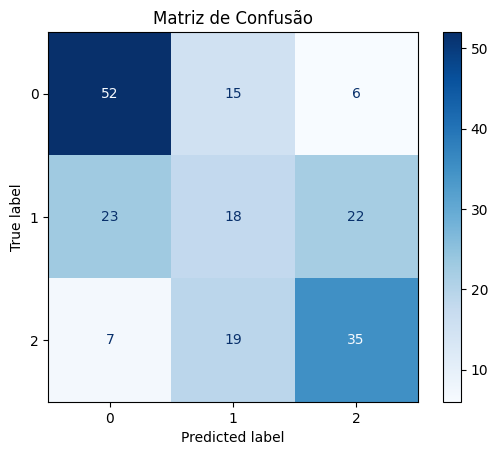

In [ ]:
# Plotamos o gráfico para analisarmos a precisão do modelo
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'{accuracy:.2f}')
print(classification_report(y_test, y_pred))

0.53
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        73
           1       0.35      0.29      0.31        63
           2       0.56      0.57      0.56        61

    accuracy                           0.53       197
   macro avg       0.51      0.52      0.52       197
weighted avg       0.52      0.53      0.52       197



O gráfico acima pode ser interpretado da seguinte forma: 52 vezes o modelo previu corretamente o valor 0, 18 vezes o valor 1 e 35 vezes o valor 2.
Analisando a primeira linha, podemos ver também que 15 vezes o modelo previu 1 quando deveria prever 0, e 6 vezes previu 2 quando deveria prever 0.
Nesse modelo, tivemos a precisão de 53%. Vamos usar outros três modelos para tentarmos aumentar esse percentual:

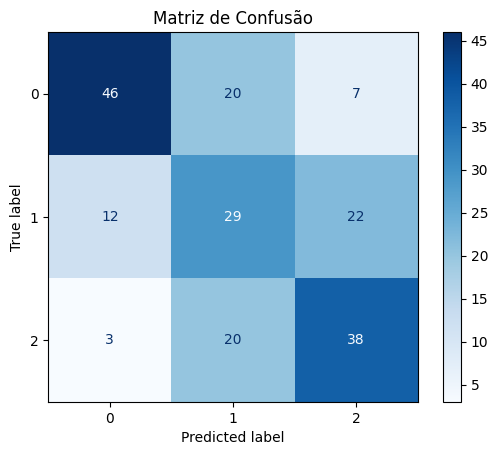

Random Forest Acurácia: 0.57
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        73
           1       0.42      0.46      0.44        63
           2       0.57      0.62      0.59        61

    accuracy                           0.57       197
   macro avg       0.58      0.57      0.57       197
weighted avg       0.59      0.57      0.58       197



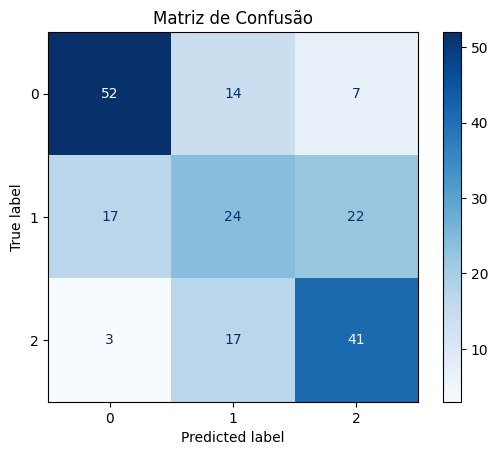

Gradient Boosting Acurácia: 0.59
              precision    recall  f1-score   support

           0       0.72      0.71      0.72        73
           1       0.44      0.38      0.41        63
           2       0.59      0.67      0.63        61

    accuracy                           0.59       197
   macro avg       0.58      0.59      0.58       197
weighted avg       0.59      0.59      0.59       197



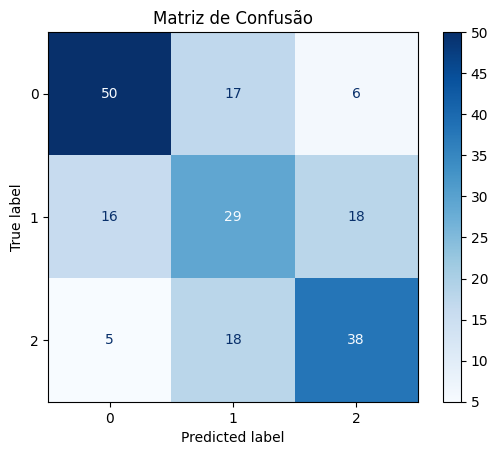

SVC Acurácia: 0.59
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        73
           1       0.45      0.46      0.46        63
           2       0.61      0.62      0.62        61

    accuracy                           0.59       197
   macro avg       0.59      0.59      0.59       197
weighted avg       0.60      0.59      0.59       197



In [ ]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVC': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão')
    plt.show()
    print(f"{name} Acurácia: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

--------------------------------

##K-MEANS
Método de segregar em torno de centros diversos dados, criando k clusters.

In [ ]:
# Vamos usar o dataframe mrk2 para aplicar k-means
mrk2.head()

,Age,Income,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAccepted,Profit
0,55,58138.0,1,635,88,546,172,88,88,1,-7
1,60,46344.0,1,11,1,6,2,1,6,0,-18
2,48,71613.0,1,426,49,127,111,21,42,0,-18
3,30,26646.0,1,11,4,20,10,3,5,0,-18
4,33,58293.0,4,173,43,118,46,27,15,0,-18


In [ ]:
mrk2['Profit'].value_counts()

,count
Profit,
-18,1464
-7,344
4,130
15,46
26,33
37,9


In [ ]:
# Ajustamos e transformamos os dados
scaled_features = scaler.fit_transform(mrk2)
scaled_features_df = pd.DataFrame(scaled_features, columns=mrk2.columns)

In [ ]:
# Importamos pacotes e dados necessários
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

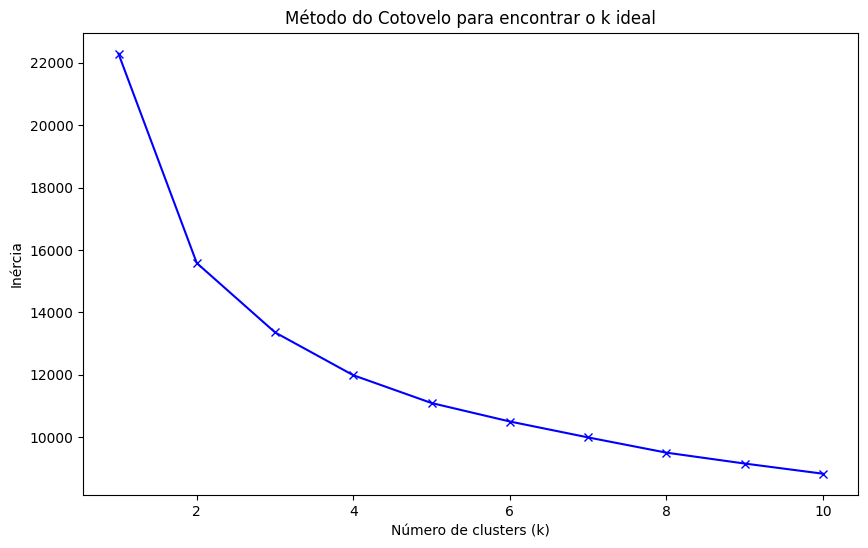

In [ ]:
# Vamos utilizar o Elbow Method (método do cotovelo) - que avalia a variação dos dados conforme o número de agrupamentos - para sabermos
# qual o número ideal de clusters que devemos utilizar.
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para encontrar o k ideal')
plt.show()

In [ ]:
# Como podemos analisar que a queda da inércia se torna menos acentuada a partir de k=4, sabemos que esse é nosso número de clusters ideal.
k = 4
kmeans = KMeans(n_clusters=k, random_state=8)
clusters = kmeans.fit_predict(scaled_features_df)
# Criamos a coluna que irá receber o valor do cluster que aquele cliente faz parte
mrk2['Clusters'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Criamos um sumário das informações em cada cluster, podendo compreender melhor grupos de clientes que têm perfis parecidos.
clusters_summary = mrk2.groupby('Clusters').mean().round().reset_index()
clusters_size = mrk2['Clusters'].value_counts().reset_index()
clusters_size.columns = ['Clusters', 'Size']

clusters_summary = pd.merge(clusters_summary, clusters_size, on='Clusters')
clusters_summary

,Clusters,Age,Income,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAccepted,Profit,Size
0,0,48.0,49765.0,4.0,265.0,8.0,73.0,12.0,8.0,26.0,0.0,-15.0,550
1,1,44.0,76589.0,2.0,834.0,47.0,403.0,65.0,53.0,73.0,3.0,12.0,178
2,2,46.0,71867.0,2.0,520.0,69.0,397.0,99.0,71.0,84.0,0.0,-15.0,486
3,3,40.0,36301.0,1.0,88.0,8.0,43.0,11.0,8.0,25.0,0.0,-16.0,812


Podemos analisar que o Cluster 0 é formado por clientes de renda mediana, grau de escolaridade alto, que não consomem muitos produtos e geralmente não aceitam campanhas, gerando prejuízo ao Supermercado. Já o Cluster 1 é formado por clientes de renda alta, grau de escolaridade mediano, que consomem bastante - principalmente vinhos e carnes - e que costumam aceitar campanhas, gerando lucro ao estabelecimento.

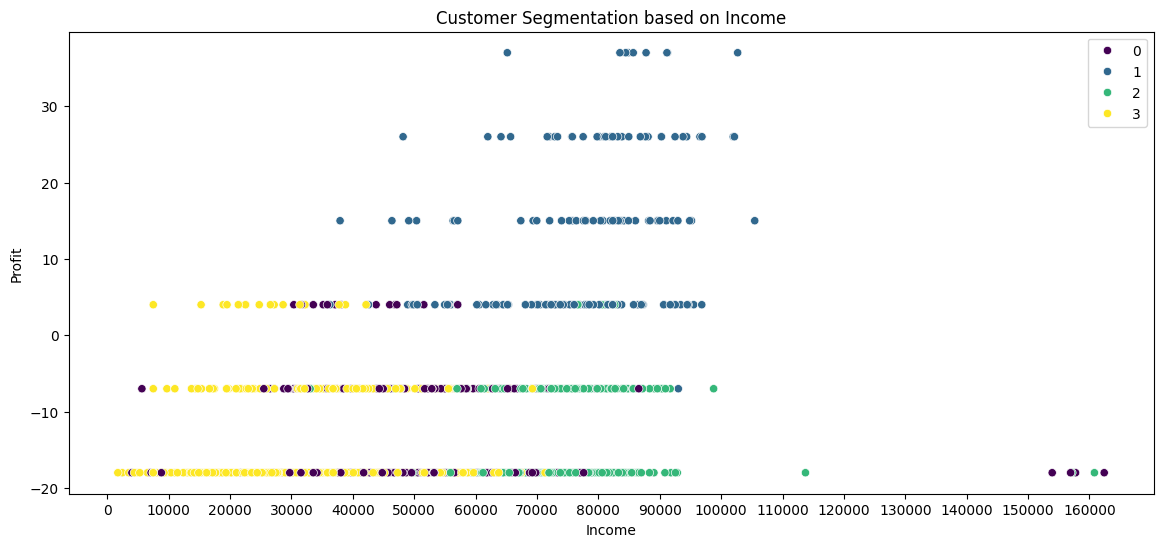

In [ ]:
# Agora, vamos visualizar a segmentação de clusters graficamente, baseado na renda dos clientes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.scatterplot(x='Income', y='Profit', hue='Clusters', data=mrk2, palette='viridis', edgecolor='w')
plt.title('Customer Segmentation based on Income')
plt.xlabel('Income')
plt.ylabel('Profit')
plt.xticks(range(0, 170000, 10000))
plt.legend()
plt.show()

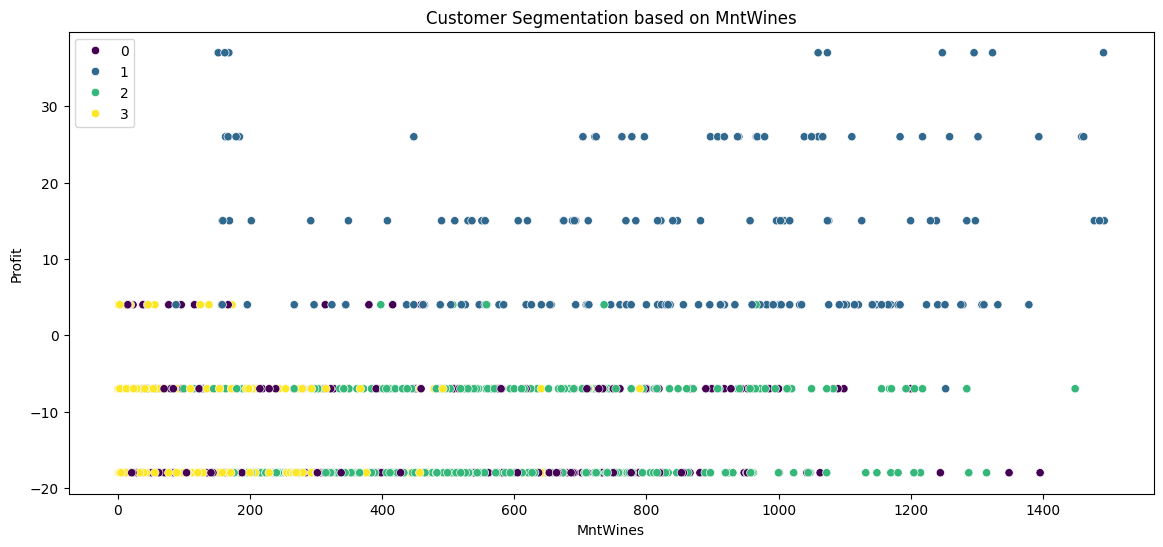

In [ ]:
# e também baseado no consumo de vinho do Supermercado
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.scatterplot(x='MntWines', y='Profit', hue='Clusters', data=mrk2, palette='viridis', edgecolor='w')
plt.title('Customer Segmentation based on MntWines')
plt.xlabel('MntWines')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)

mrk22 = pca.fit_transform(mrk2)
mrk22.shape

(2026, 2)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=8)
label = kmeans.fit_predict(mrk22)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


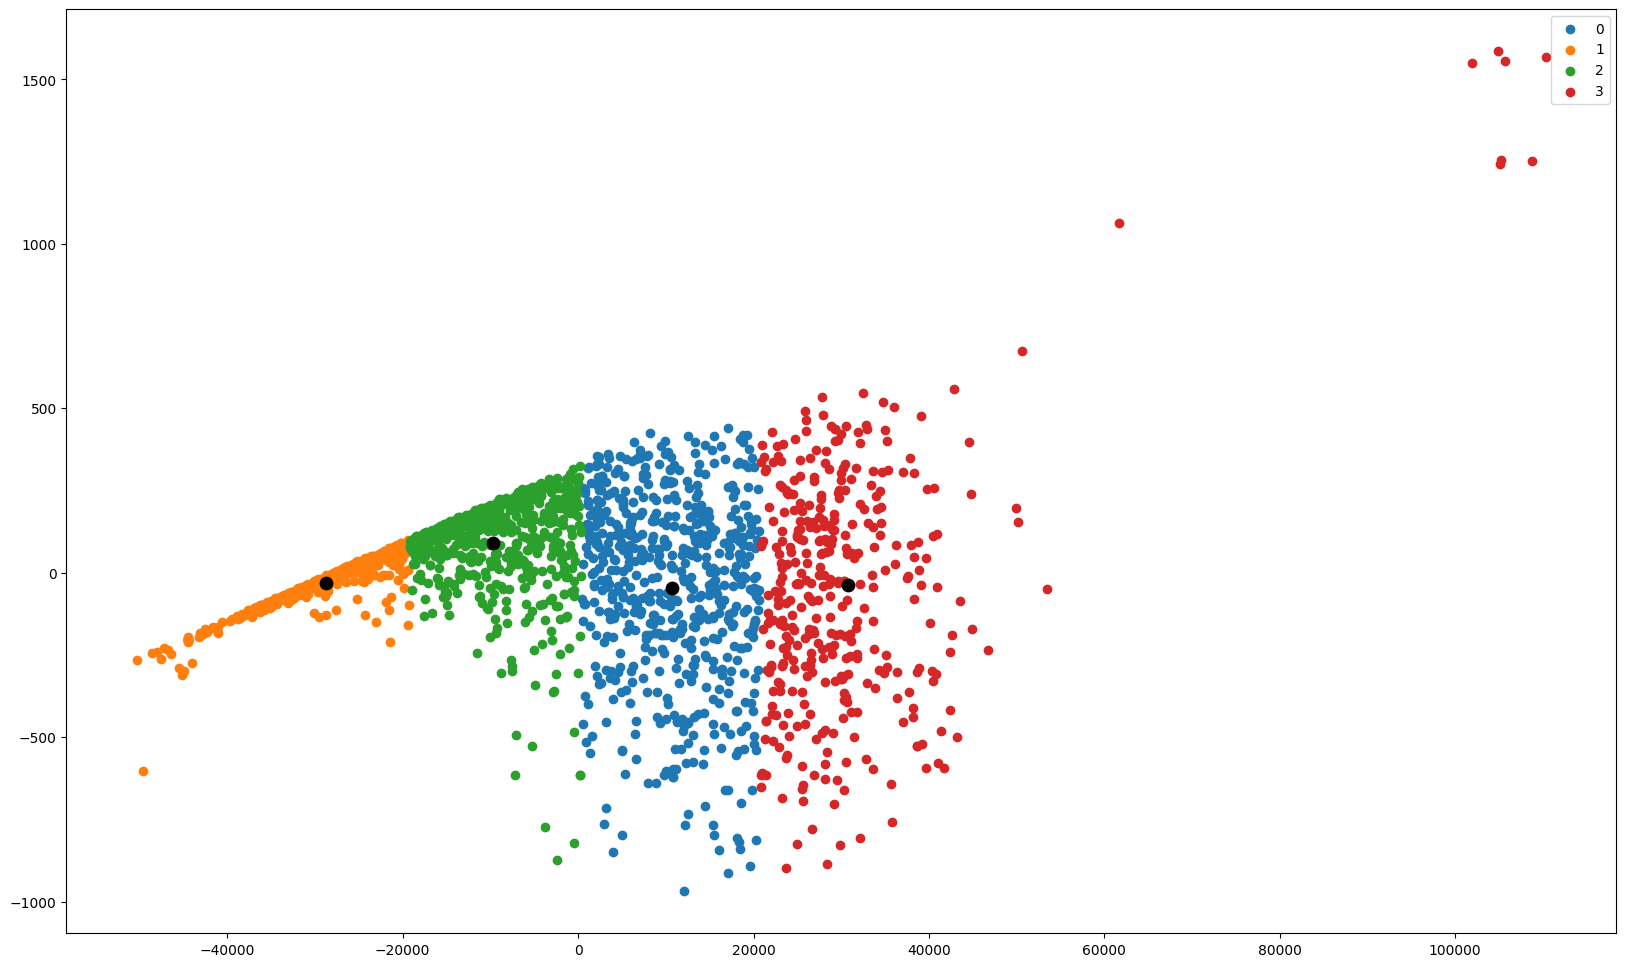

In [ ]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(20, 12))
for i in u_labels:
    plt.scatter(mrk22[label == i, 0], mrk22[label == i, 1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()